In [1]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetSinteticUnsupervisedLSTM

figure(figsize=(8, 6), dpi=80)

limiter = 2000

ABS_PATH = '/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset'

test_dataset = DatasetSinteticUnsupervisedLSTM(dir_data=f'{ABS_PATH}/Datasets/sintetic_data/test_compressor_data.h5',
                                               context=100,
                                               stride=1)

test_loader = torch.utils.data.DataLoader(
                test_dataset, batch_size=1, shuffle=False
                )

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2105/2105 [00:00<00:00, 1902393.86it/s]

len dataset:2105


<Figure size 640x480 with 0 Axes>

In [2]:
def union_vector_predicted_dict(data_predict:dict):
    
    x_concat = data_predict[0]
    
    del data_predict[0]
    
    keys_predicted = list(data_predict.keys())
    
    for key in keys_predicted:
        x_concat = torch.concat((x_concat, data_predict[key]), dim=1)
        #x_concat = torch.concat((x_concat, data_predict[key]), dim=2)
        
        del data_predict[key]
    
    return x_concat

In [3]:
data_predict = torch.load(f"../models_h5/generate_evaluate/sintetic_generate_data_LSTM.pt")

In [4]:
data_predict[0].shape

torch.Size([1, 1, 1])

In [5]:
vet_predict = union_vector_predicted_dict(data_predict)

In [6]:
vet_predict[0,400:,0]

tensor([-0.2613, -0.2625, -0.2688,  ..., -0.2701, -0.2780, -0.2677])

## Concat Vets

In [7]:
# x_true, _ = test_loader.dataset[0]

# get_n_elements = len(test_loader.dataset)

# for i in range(1, get_n_elements):
    
#     x_second, _ = test_loader.dataset[i]
    
#     x_true = torch.concat((x_true, x_second), dim=0)
    
x_true = test_dataset.data

x_true.shape, vet_predict.shape

((2205, 1), torch.Size([1, 2205, 1]))

### First channel

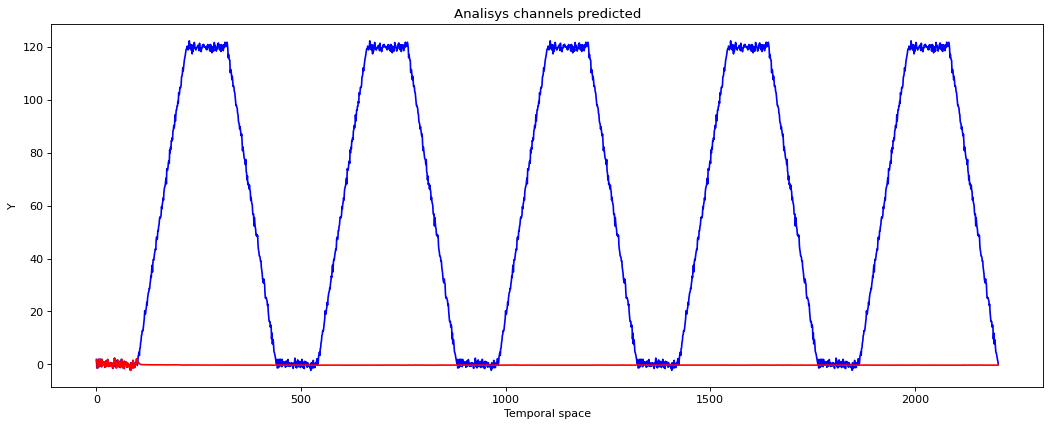

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 0
limiter = init_limiter + 5400

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
# plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
# plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')
plt.plot(x_true, color='blue', label='sinal Real')
plt.plot(vet_predict[0,:,0], color='r', label='sinal previsto')


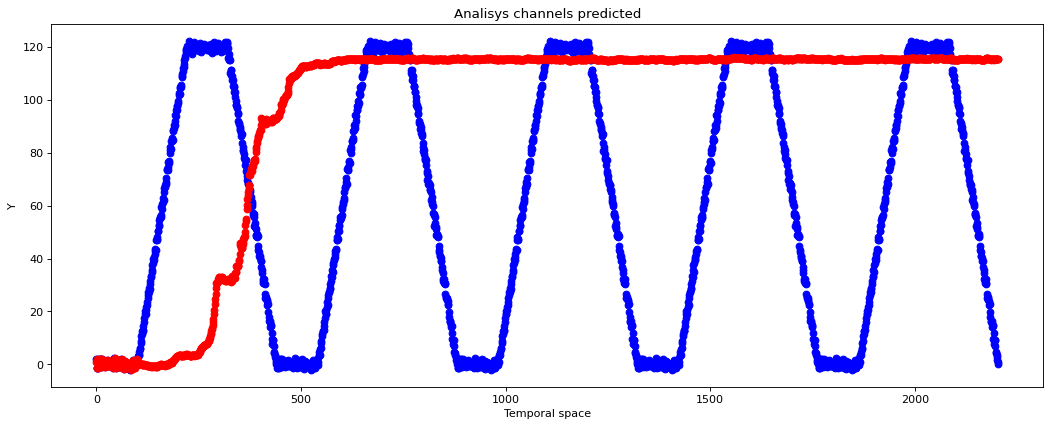

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 0
limiter = init_limiter + 5400

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
# plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
# plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')
plt.plot(x_true, "o", color='blue', label='sinal Real')
plt.plot(vet_predict[0], "o", color='r', label='sinal previsto')


In [10]:
abs(x_true[init_limiter:limiter] - vet_predict[0][init_limiter:limiter].numpy())[:100]

array([[1.02073002],
       [3.23090976],
       [0.07727401],
       [2.23988175],
       [2.14252012],
       [3.11674455],
       [2.35724014],
       [0.33383583],
       [2.67039685],
       [0.44242725],
       [0.3870442 ],
       [0.9615143 ],
       [1.76727035],
       [2.77129062],
       [2.17806831],
       [1.07045977],
       [0.14479559],
       [1.10226207],
       [0.76908946],
       [0.30812732],
       [0.54578117],
       [1.47582633],
       [1.39763893],
       [1.02814771],
       [2.02095372],
       [0.54493332],
       [0.28551901],
       [2.28441727],
       [1.17696903],
       [0.2648329 ],
       [1.1773779 ],
       [1.30916525],
       [1.21358184],
       [0.70616324],
       [0.66767664],
       [1.31227937],
       [0.09984245],
       [0.78488959],
       [0.60430547],
       [1.48906821],
       [0.39819603],
       [1.93064925],
       [0.27271821],
       [0.46835794],
       [1.74811331],
       [1.43866537],
       [1.85730169],
       [2.029

In [11]:
type(x_true[init_limiter:limiter, feature_channel])

numpy.ndarray